In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sales = pd.read_csv('data/sales_train_evaluation.csv')

In [3]:
calendar = pd.read_csv('data/calendar.csv')

In [4]:
prices = pd.read_csv('data/sell_prices.csv')

for i in range(1942,1970):
    col = 'd_'+ str(i)
    sales[col] = 0
    sales[col] = sales[col].astype(np.int16)

In [6]:
def downcast(df):
    for col in df.columns:
        if 'int' in str(df[col].dtype):
            if ((df[col].min()>np.iinfo(np.int8).min) and (df[col].max()<np.iinfo(np.int8).max)):
                df[col] = df[col].astype(np.int8)
            elif ((df[col].min()>np.iinfo(np.int16).min) and (df[col].max()<np.iinfo(np.int16).max)):
                df[col] = df[col].astype(np.int16)
            elif ((df[col].min()>np.iinfo(np.int32).min) and (df[col].max()<np.iinfo(np.int32).max)):
                df[col] = df[col].astype(np.int32)
            elif ((df[col].min()>np.iinfo(np.int64).min) and (df[col].max()<np.iinfo(np.int64).max)):
                df[col] = df[col].astype(np.int64)
        
        elif 'float' in str(df[col].dtype):
            if ((df[col].min()>np.finfo(np.float16).min) and (df[col].max()<np.finfo(np.float16).max)):
                df[col] = df[col].astype(np.float16)
            elif ((df[col].min()>np.finfo(np.float32).min) and (df[col].max()<np.finfo(np.float32).max)):
                df[col] = df[col].astype(np.float32)
            elif ((df[col].min()>np.finfo(np.float64).min) and (df[col].max()<np.finfo(np.float64).max)):
                df[col] = df[col].astype(np.float64)
                
        elif 'object' in str(df[col].dtype):
            if col=='date':
                df[col] = pd.to_datetime(df[col],format='%Y-%m-%d')
            else:
                df[col] = df[col].astype('category')
     
    return df        




            
            
        

In [7]:
sales = downcast(sales)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: category(6), int16(1317), int8(624)
memory usage: 96.3 MB


In [8]:
calendar = downcast(calendar)
prices = downcast(prices)

In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    int16   
 3   sell_price  float16 
dtypes: category(2), float16(1), int16(1)
memory usage: 45.8 MB


data = pd.melt(sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='days',value_name='sold')

data = pd.merge(data,calendar,left_on='days',right_on='d',how='left')

data = pd.merge(data,prices,on=['store_id','item_id','wm_yr_wk'],how='left')

Exploratory data analysis

In [9]:
#Distribution of items prices wrt stores

for x in data['store_id'].unique():
    X = data[data['store_id']==x]
    X = pd.DataFrame(X.groupby('item_id')['sell_price'].mean())
    X.reset_index(inplace=True)
    sns.histplot(X,kde=True)
    print ('Highest item sold', X.sort_values(by='sell_price',ascending=False).iloc[0])
    plt.title('item distribution accross'+x)
    plt.show()

In [10]:
#Distribution of items sold wrt stores

In [10]:
sales

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
0         CA_1       CA    0    0    0    0  ...       2       4       0   
1         CA_1       CA    0    0    0    0  ...       0       1       2   
2         CA_1       CA    0    0    0    0  ...       1       0       2   
3         CA_1       CA    0    0    0    0  ...       1       1       0   
4         CA_1       CA    0    0    0    0  ...       0       0       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       1       0       3   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       0       1   
30488     WI_3       WI    0    0    0    0  ...       1       1       1   
30489     WI_3       WI    0    0    0    0  ...       1       2       0   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0           0       0       0       3       3       0       1  
1           1       1       0       0       0       0       0  
2           0       0       0       2       3       0       1  
3           4       0       1       3       0       2       6  
4           2       1       0       0       2       1       0  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       1       1       0       0       1       1  
30486       0       0       0       1       0       1       0  
30487       2       0       1       0       1       0       2  
30488       4       6       0       1       1       1       0  
30489       5       4       0       2       2       5       1  

[30490 rows x 1947 columns]

In [11]:
# Check sales for 1 id
sales_ = pd.melt(sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='days',value_name='sold')

In [12]:
sales_es_

id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
59181085    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
59181086    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
59181087    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
59181088    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
59181089    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id    days  sold  
0            CA_1       CA     d_1     0  
1            CA_1       CA     d_1     0  
2            CA_1       CA     d_1     0  
3            CA_1       CA     d_1     0  
4            CA_1       CA     d_1     0  
...           ...      ...     ...   ...  
59181085     WI_3       WI  d_1941     1  
59181086     WI_3       WI  d_1941     0  
59181087     WI_3       WI  d_1941     2  
59181088     WI_3       WI  d_1941     0  
59181089     WI_3       WI  d_1941     1  

[59181090 rows x 8 columns]

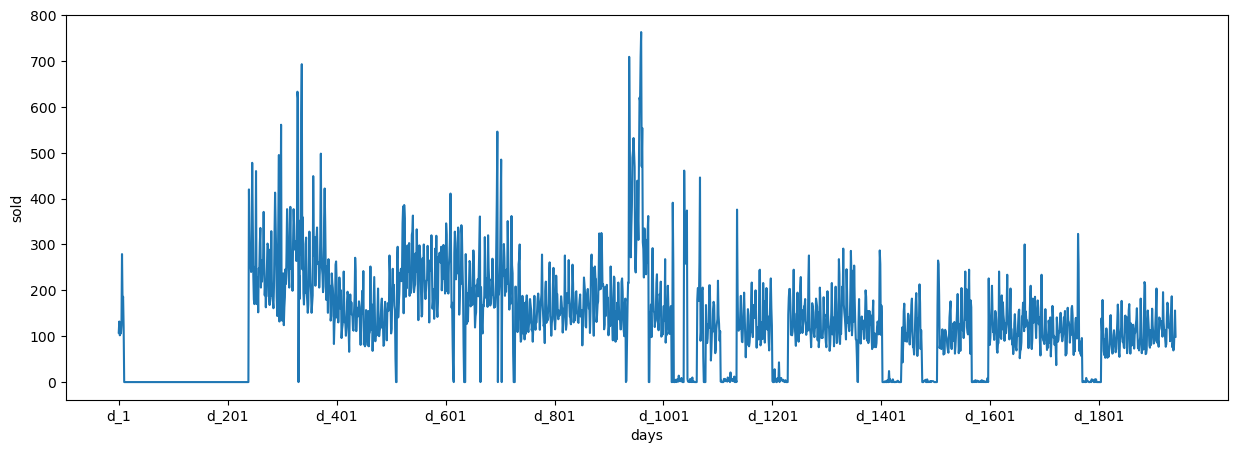

In [13]:
fig,ax = plt.subplots(figsize = (15,5))

sns.lineplot(data=sales_[sales_['id']=='FOODS_3_090_CA_3_evaluation'],x='days',y='sold',ax=ax)

x_ticks_display = sales_[sales_['id']=='FOODS_3_090_CA_3_evaluation']['days'].values[::200]
ax.set_xticks(x_ticks_display)

plt.show()


In [13]:
#Add actual dates
sales_ = pd.merge(sales_,calendar,left_on='days',right_on='d',how='left')

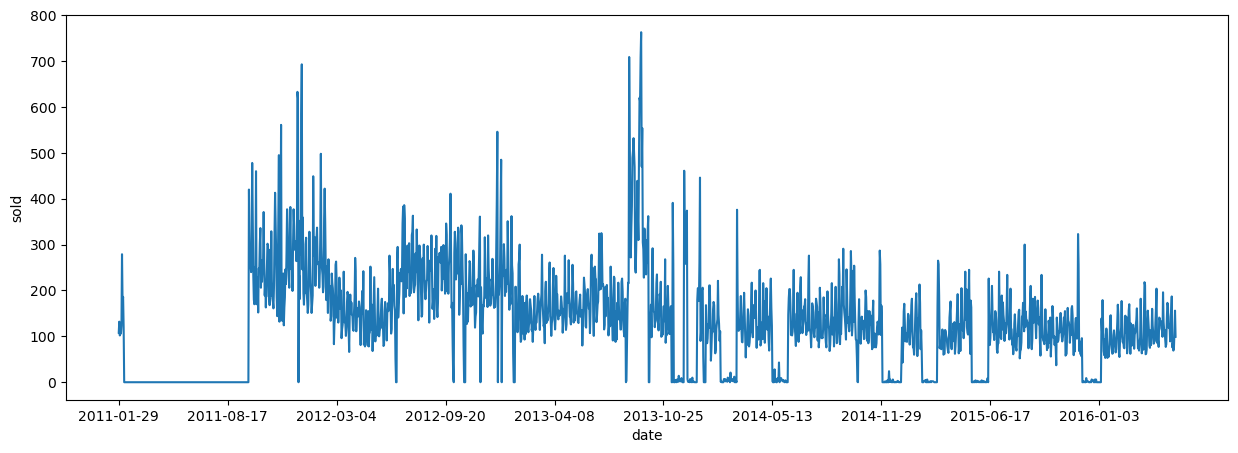

In [15]:
fig,ax = plt.subplots(figsize = (15,5))

sns.lineplot(data=sales_[sales_['id']=='FOODS_3_090_CA_3_evaluation'],x='date',y='sold',ax=ax)

x_ticks_display = sales_[sales_['id']=='FOODS_3_090_CA_3_evaluation']['date'].values[::200]
ax.set_xticks(x_ticks_display)

plt.show()

In [16]:
#Sales of item over day of week/month/year

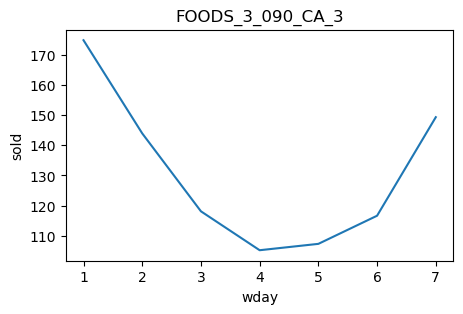

In [17]:
#['FOODS_3_090_CA_3']



fig,ax = plt.subplots(figsize=(5,3))
X = pd.DataFrame(sales_[sales_['id']=='FOODS_3_090_CA_3_evaluation'].groupby('wday')['sold'].mean())
X.reset_index(inplace=True)

sns.lineplot(data=X,x='wday',y='sold')
plt.title('FOODS_3_090_CA_3')
plt.show()



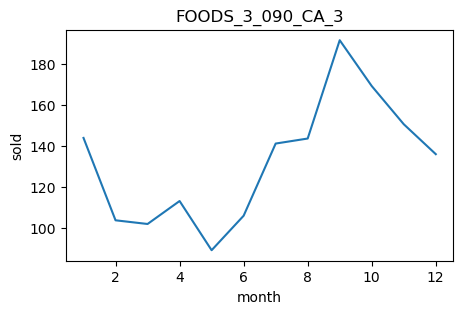

In [18]:
fig,ax = plt.subplots(figsize=(5,3))
X = pd.DataFrame(sales_[sales_['id']=='FOODS_3_090_CA_3_evaluation'].groupby('month')['sold'].mean())
X.reset_index(inplace=True)

sns.lineplot(data=X,x='month',y='sold')
plt.title('FOODS_3_090_CA_3')
plt.show()

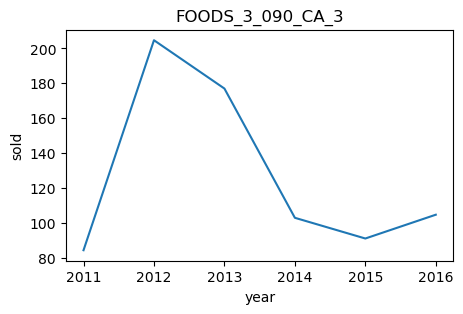

In [19]:
fig,ax = plt.subplots(figsize=(5,3))
X = pd.DataFrame(sales_[sales_['id']=='FOODS_3_090_CA_3_evaluation'].groupby('year')['sold'].mean())
X.reset_index(inplace=True)

sns.lineplot(data=X,x='year',y='sold')
plt.title('FOODS_3_090_CA_3')
plt.show()

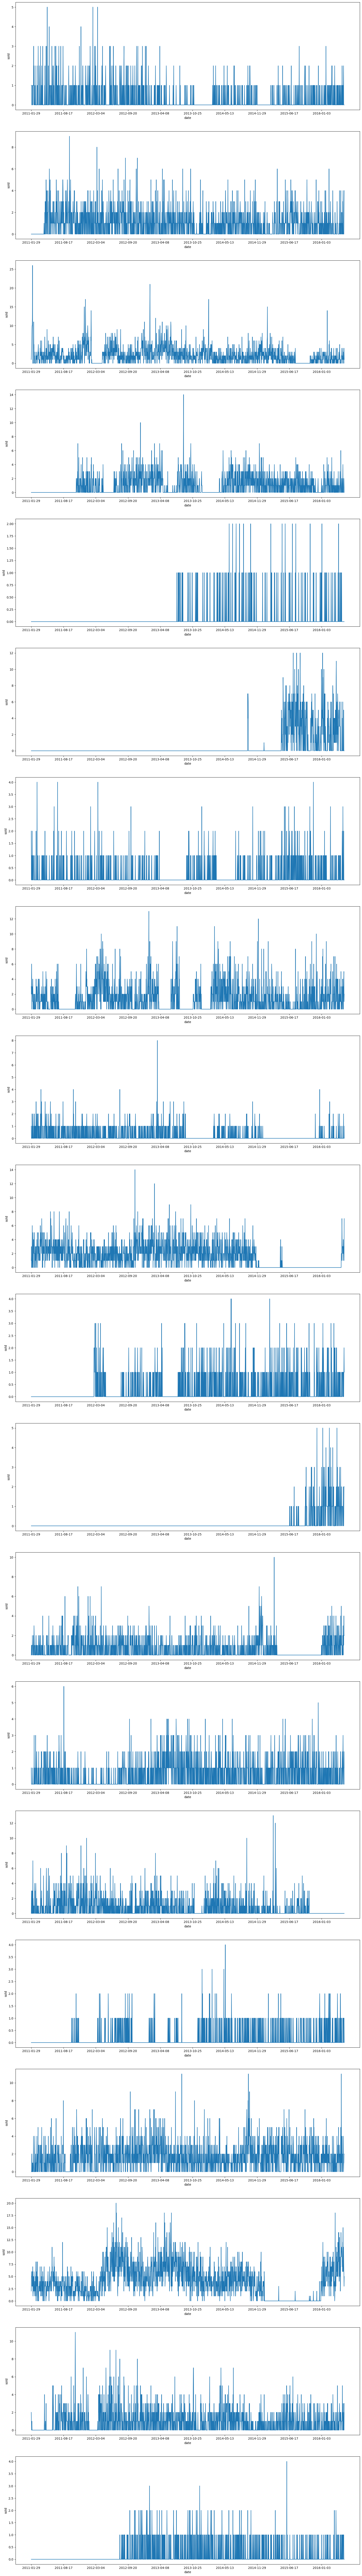

In [20]:
# Look at 20 different items and their sales

import random
items = random.sample(list(sales_['id']),20)
fig,ax = plt.subplots(len(items),figsize = (20,150))

for i,item in enumerate(items):
    sns.lineplot(data=sales_[sales_['id']==item],x='date',y='sold',ax=ax[i])
    x_ticks_display = sales_[sales_['id']==item]['date'].values[::200]
    ax[i].set_xticks(x_ticks_display)
    

plt.show()


In [ ]:
#Combined sales over time (year) by type

In [21]:
cat = list(sales_['cat_id'].unique())

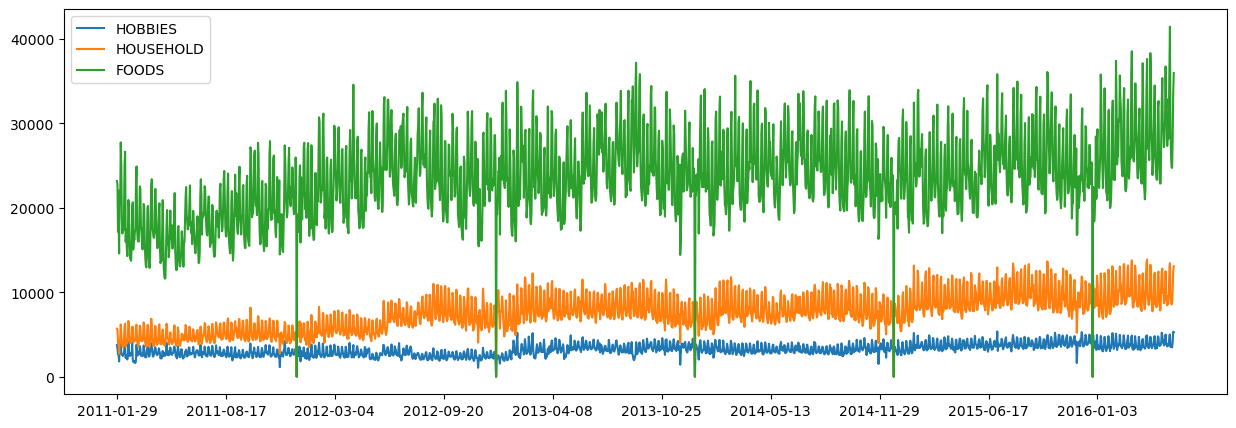

In [22]:
plt.figure(figsize=(15,5))
for c in cat:
    X = pd.DataFrame(sales_[sales_['cat_id']==c].groupby('date')['sold'].sum())
    X.reset_index(inplace=True)
    plt.plot(X['date'],X['sold'],label=c)
    plt.xticks(X['date'].values[::200])


plt.legend()
plt.show()

In [23]:
#Total sales by stores (rolling mean for 90 days)

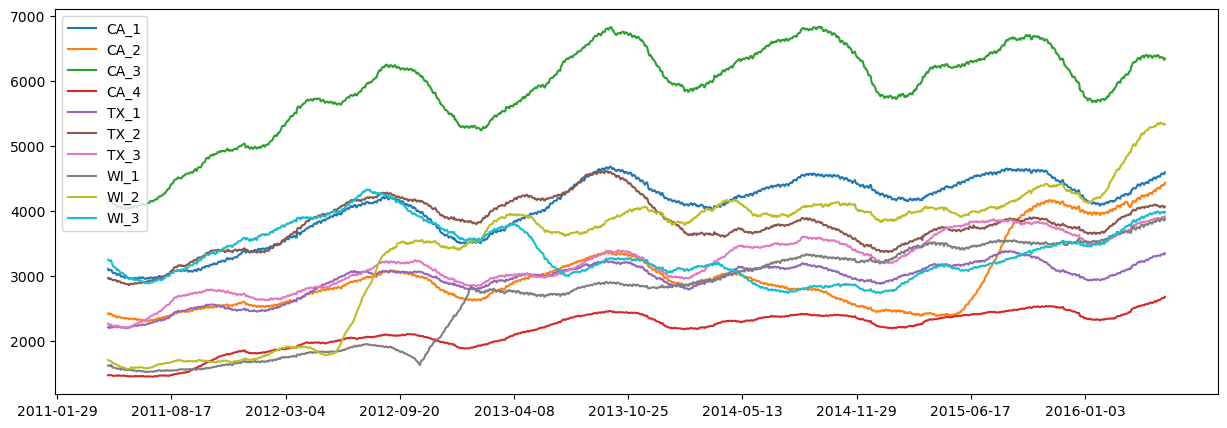

In [24]:
cat = list(sales_['store_id'].unique())
plt.figure(figsize=(15,5))
for c in cat:
    X = pd.DataFrame(sales_[sales_['store_id']==c].groupby('date')['sold'].sum().rolling(90).mean())
    X.reset_index(inplace=True)
    plt.plot(X['date'],X['sold'],label=c)
    plt.xticks(X['date'].values[::200])


plt.legend()
plt.show()

In [25]:
#Weekly sales by store id

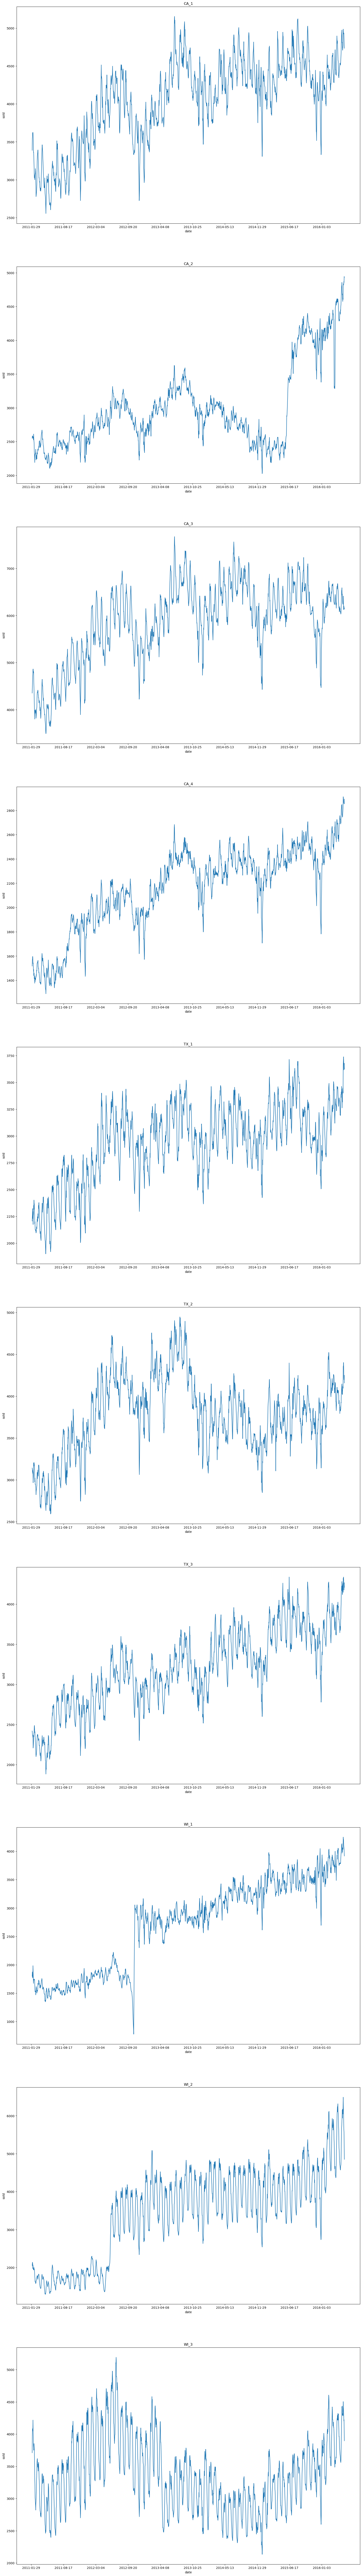

In [26]:
cat = list(sales_['store_id'].unique())
fig,ax = plt.subplots(len(cat),figsize = (20,150))

for i,c in enumerate(cat):
    X = pd.DataFrame(sales_[sales_['store_id']==c].groupby('date')['sold'].sum().rolling(7).mean())
    X.reset_index(inplace=True)
    sns.lineplot(data=X,x='date',y='sold',ax=ax[i])
    x_ticks_display = X['date'].values[::200]
    ax[i].set_xticks(x_ticks_display)
    ax[i].set_title(c)
    

plt.show()

In [14]:
#Finding the highest sale day and lowest sale day including values

X = pd.DataFrame(sales_.groupby('date')['sold'].sum())
X.reset_index(inplace=True)

In [15]:
X.sort_values('sold',ascending=False)
#Highest value of sales is 59k on 15th may,2016

date   sold
1933 2016-05-15  59921
1863 2016-03-06  57218
1891 2016-04-03  56425
1897 2016-04-09  56340
1834 2016-02-06  55040
...         ...    ...
1061 2013-12-25     20
1426 2014-12-25     20
1791 2015-12-25     14
330  2011-12-25     13
696  2012-12-25     11

[1941 rows x 2 columns]

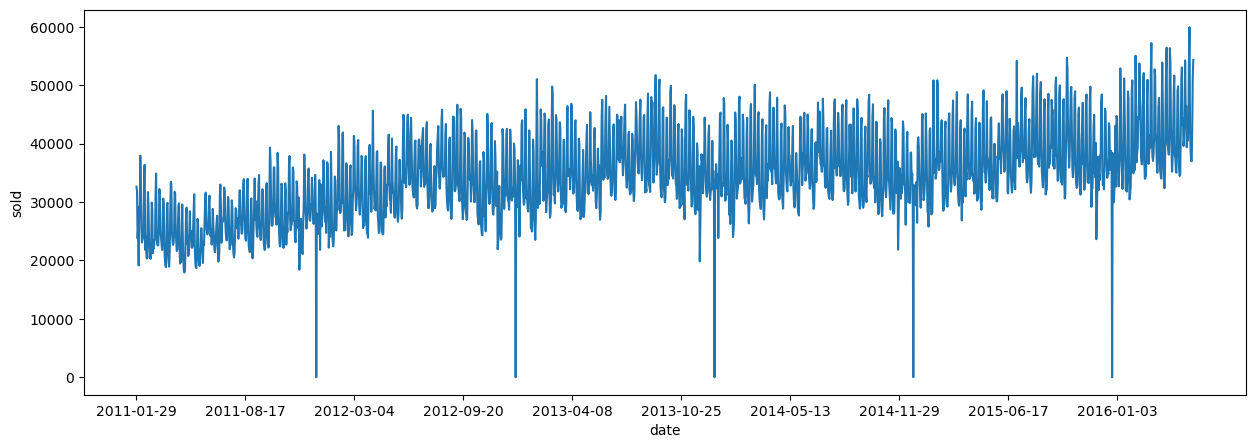

In [16]:
#plot the total sales of walmart across the time
plt.figure(figsize=(15,5))
sns.lineplot(data=X, x='date',y='sold')
plt.xticks(X['date'].values[::200])
plt.show()

In [17]:
sales_

id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
59181085    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
59181086    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
59181087    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
59181088    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
59181089    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id    days  sold       date  wm_yr_wk  ... month  \
0            CA_1       CA     d_1     0 2011-01-29     11101  ...     1   
1            CA_1       CA     d_1     0 2011-01-29     11101  ...     1   
2            CA_1       CA     d_1     0 2011-01-29     11101  ...     1   
3            CA_1       CA     d_1     0 2011-01-29     11101  ...     1   
4            CA_1       CA     d_1     0 2011-01-29     11101  ...     1   
...           ...      ...     ...   ...        ...       ...  ...   ...   
59181085     WI_3       WI  d_1941     1 2016-05-22     11617  ...     5   
59181086     WI_3       WI  d_1941     0 2016-05-22     11617  ...     5   
59181087     WI_3       WI  d_1941     2 2016-05-22     11617  ...     5   
59181088     WI_3       WI  d_1941     0 2016-05-22     11617  ...     5   
59181089     WI_3       WI  d_1941     1 2016-05-22     11617  ...     5   

          year       d  event_name_1 event_type_1 event_name_2 event_type_2  \
0         2011     d_1           NaN          NaN          NaN          NaN   
1         2011     d_1           NaN          NaN          NaN          NaN   
2         2011     d_1           NaN          NaN          NaN          NaN   
3         2011     d_1           NaN          NaN          NaN          NaN   
4         2011     d_1           NaN          NaN          NaN          NaN   
...        ...     ...           ...          ...          ...          ...   
59181085  2016  d_1941           NaN          NaN          NaN          NaN   
59181086  2016  d_1941           NaN          NaN          NaN          NaN   
59181087  2016  d_1941           NaN          NaN          NaN          NaN   
59181088  2016  d_1941           NaN          NaN          NaN          NaN   
59181089  2016  d_1941           NaN          NaN          NaN          NaN   

         snap_CA snap_TX  snap_WI  
0              0       0        0  
1              0       0        0  
2              0       0        0  
3              0       0        0  
4              0       0        0  
...          ...     ...      ...  
59181085       0       0        0  
59181086       0       0        0  
59181087       0       0        0  
59181088       0       0        0  
59181089       0       0        0  

[59181090 rows x 22 columns]

In [18]:
calendar.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0 2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1 2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2 2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3 2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4 2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [19]:
X = pd.merge(X,calendar,on='date')

In [20]:
X[X['sold']<500]
# As we can see that on christmas holidays the sales overall across all stores and states are very low

date  sold  wm_yr_wk    weekday  wday  month  year       d  \
330  2011-12-25    13     11148     Sunday     2     12  2011   d_331   
696  2012-12-25    11     11248    Tuesday     4     12  2012   d_697   
1061 2013-12-25    20     11348  Wednesday     5     12  2013  d_1062   
1426 2014-12-25    20     11447   Thursday     6     12  2014  d_1427   
1791 2015-12-25    14     11547     Friday     7     12  2015  d_1792   

     event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
330     Christmas     National          NaN          NaN        0        0   
696     Christmas     National          NaN          NaN        0        0   
1061    Christmas     National          NaN          NaN        0        0   
1426    Christmas     National          NaN          NaN        0        0   
1791    Christmas     National          NaN          NaN        0        0   

      snap_WI  
330         0  
696         0  
1061        0  
1426        0  
1791        0

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1941 non-null   datetime64[ns]
 1   sold          1941 non-null   int64         
 2   wm_yr_wk      1941 non-null   int16         
 3   weekday       1941 non-null   category      
 4   wday          1941 non-null   int8          
 5   month         1941 non-null   int8          
 6   year          1941 non-null   int16         
 7   d             1941 non-null   category      
 8   event_name_1  158 non-null    category      
 9   event_type_1  158 non-null    category      
 10  event_name_2  4 non-null      category      
 11  event_type_2  4 non-null      category      
 12  snap_CA       1941 non-null   int8          
 13  snap_TX       1941 non-null   int8          
 14  snap_WI       1941 non-null   int8          
dtypes: category(6), datetime64[ns](1), int

In [22]:
X['event_name_1'].value_counts()

Mother's day           6
ValentinesDay          6
SuperBowl              6
StPatricksDay          6
Purim End              6
PresidentsDay          6
Pesach End             6
LentStart              6
LentWeek2              6
NBAFinalsEnd           5
Thanksgiving           5
Ramadan starts         5
OrthodoxEaster         5
OrthodoxChristmas      5
NewYear                5
NBAFinalsStart         5
Chanukah End           5
Christmas              5
MemorialDay            5
MartinLutherKingDay    5
LaborDay               5
IndependenceDay        5
Halloween              5
EidAlAdha              5
Eid al-Fitr            5
Easter                 5
ColumbusDay            5
Cinco De Mayo          5
VeteransDay            5
Father's day           4
Name: event_name_1, dtype: int64

# Prophet Model for Overall sales

In [23]:
#Install Python
!pip install prophet


In [30]:
from prophet import Prophet

In [28]:
#Train and test split
df_train = X.iloc[:1913,:]

In [29]:
df_train

date   sold  wm_yr_wk    weekday  wday  month  year       d  \
0    2011-01-29  32631     11101   Saturday     1      1  2011     d_1   
1    2011-01-30  31749     11101     Sunday     2      1  2011     d_2   
2    2011-01-31  23783     11101     Monday     3      1  2011     d_3   
3    2011-02-01  25412     11101    Tuesday     4      2  2011     d_4   
4    2011-02-02  19146     11101  Wednesday     5      2  2011     d_5   
...         ...    ...       ...        ...   ...    ...   ...     ...   
1908 2016-04-20  35343     11612  Wednesday     5      4  2016  d_1909   
1909 2016-04-21  35033     11612   Thursday     6      4  2016  d_1910   
1910 2016-04-22  40517     11612     Friday     7      4  2016  d_1911   
1911 2016-04-23  48962     11613   Saturday     1      4  2016  d_1912   
1912 2016-04-24  49795     11613     Sunday     2      4  2016  d_1913   

     event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
0             NaN          NaN          NaN          NaN        0        0   
1             NaN          NaN          NaN          NaN        0        0   
2             NaN          NaN          NaN          NaN        0        0   
3             NaN          NaN          NaN          NaN        1        1   
4             NaN          NaN          NaN          NaN        1        0   
...           ...          ...          ...          ...      ...      ...   
1908          NaN          NaN          NaN          NaN        0        0   
1909          NaN          NaN          NaN          NaN        0        0   
1910          NaN          NaN          NaN          NaN        0        0   
1911          NaN          NaN          NaN          NaN        0        0   
1912          NaN          NaN          NaN          NaN        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1908        0  
1909        0  
1910        0  
1911        0  
1912        0  

[1913 rows x 15 columns]

In [33]:
df_test = X.iloc[1913:,:]

In [34]:
df_test.shape

(28, 15)

In [36]:
#Holidays
X_holidays = X[pd.notna(X['event_name_1'])]

In [39]:
X_holidays = X_holidays[['date','event_name_1']]

In [41]:
X_holidays['ds'] = X_holidays['date']

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_2932\832325441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_holidays['ds'] = X_holidays['date']


In [43]:
X_holidays['holiday'] = X_holidays['event_name_1']

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_2932\344971448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_holidays['holiday'] = X_holidays['event_name_1']


In [45]:
X_holidays.drop(columns=['date','event_name_1'],inplace=True)

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_2932\3533948723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_holidays.drop(columns=['date','event_name_1'],inplace=True)


In [46]:
X_holidays

ds         holiday
8    2011-02-06       SuperBowl
16   2011-02-14   ValentinesDay
23   2011-02-21   PresidentsDay
39   2011-03-09       LentStart
46   2011-03-16       LentWeek2
...         ...             ...
1884 2016-03-27          Easter
1918 2016-04-30      Pesach End
1919 2016-05-01  OrthodoxEaster
1923 2016-05-05   Cinco De Mayo
1926 2016-05-08    Mother's day

[158 rows x 2 columns]

In [47]:
df_train_prophet = pd.DataFrame()

In [48]:
df_train_prophet['ds'] = df_train['date']

In [49]:
df_train_prophet['y'] = df_train['sold']

In [50]:
df_train_prophet

ds      y
0    2011-01-29  32631
1    2011-01-30  31749
2    2011-01-31  23783
3    2011-02-01  25412
4    2011-02-02  19146
...         ...    ...
1908 2016-04-20  35343
1909 2016-04-21  35033
1910 2016-04-22  40517
1911 2016-04-23  48962
1912 2016-04-24  49795

[1913 rows x 2 columns]

In [70]:
m = Prophet(yearly_seasonality=True)
m.fit(df_train_prophet)

09:58:39 - cmdstanpy - INFO - Chain [1] start processing
09:58:40 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
future = m.make_future_dataframe(periods=28)

In [72]:
future.tail()

ds
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

In [73]:
df_train_prophet

ds      y
0    2011-01-29  32631
1    2011-01-30  31749
2    2011-01-31  23783
3    2011-02-01  25412
4    2011-02-02  19146
...         ...    ...
1908 2016-04-20  35343
1909 2016-04-21  35033
1910 2016-04-22  40517
1911 2016-04-23  48962
1912 2016-04-24  49795

[1913 rows x 2 columns]

In [76]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


ds          yhat    yhat_lower    yhat_upper
0    2011-01-29  30389.334673  25913.630849  34654.497176
1    2011-01-30  30062.866113  26013.540696  34346.319239
2    2011-01-31  21902.471783  17368.493643  26133.088784
3    2011-02-01  19512.664783  14911.329427  23956.219013
4    2011-02-02  19250.315392  14868.884157  23695.872322
...         ...           ...           ...           ...
1936 2016-05-18  36551.818835  32004.377149  40680.573627
1937 2016-05-19  36810.712235  32549.377774  41164.221817
1938 2016-05-20  40904.600207  36601.918152  45212.705646
1939 2016-05-21  48348.086453  43888.233549  52727.460449
1940 2016-05-22  48020.968439  43409.540679  52497.639079

[1941 rows x 4 columns]

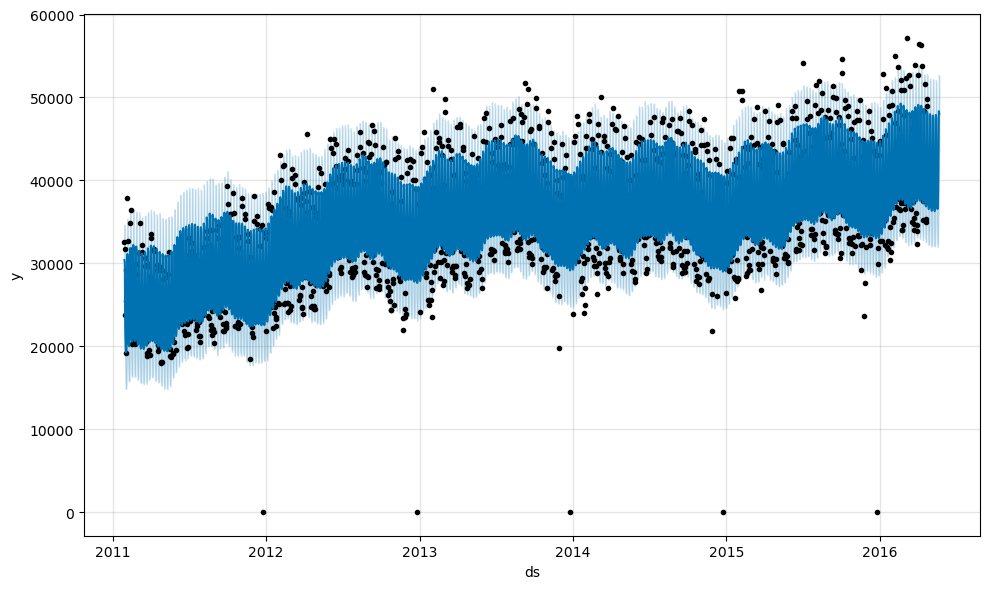

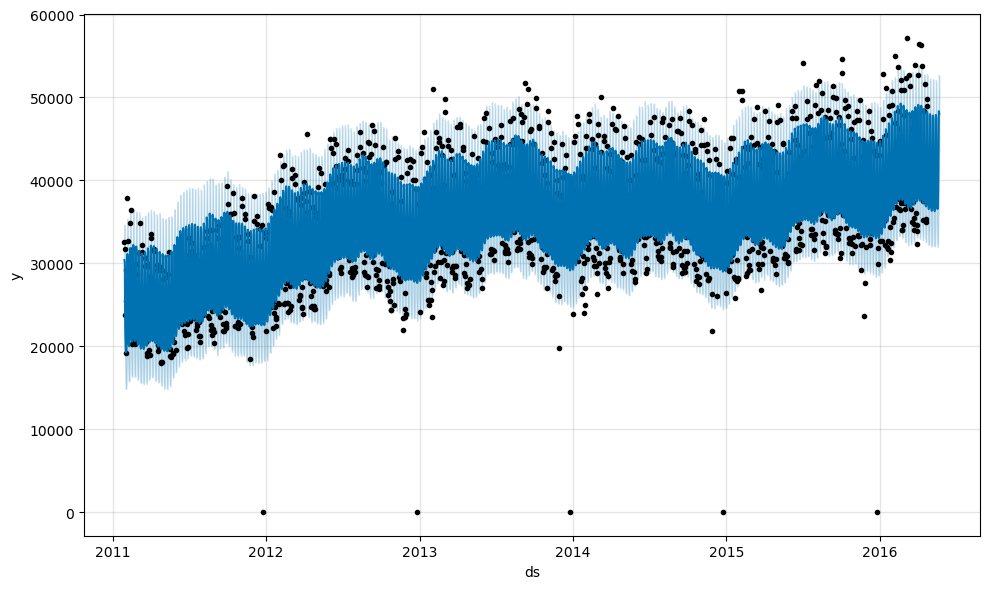

In [77]:
m.plot(forecast)

In [78]:
Compare = pd.DataFrame()

In [79]:
Compare['date'] = df_test['date']

In [80]:
Compare['Actual'] = df_test['sold']

In [81]:
Compare['Predicted'] = forecast['yhat']

In [83]:
Compare

date  Actual     Predicted
1913 2016-04-25   38793  39485.510667
1914 2016-04-26   35487  36950.926754
1915 2016-04-27   34445  36544.018268
1916 2016-04-28   34732  36693.108955
1917 2016-04-29   42896  40670.367708
1918 2016-04-30   50429  47990.654836
1919 2016-05-01   53032  47534.219429
1920 2016-05-02   43181  39244.148283
1921 2016-05-03   44314  36725.046741
1922 2016-05-04   39601  36334.092105
1923 2016-05-05   40763  36499.959392
1924 2016-05-06   43805  40495.224583
1925 2016-05-07   54239  47835.190917
1926 2016-05-08   45609  47400.564523
1927 2016-05-09   46400  39134.880631
1928 2016-05-10   39379  36643.161507
1929 2016-05-11   42248  36282.947600
1930 2016-05-12   40503  36483.202455
1931 2016-05-13   44073  40516.697291
1932 2016-05-14   54308  47898.821509
1933 2016-05-15   59921  47510.245962
1934 2016-05-16   42362  39294.340767
1935 2016-05-17   38777  36855.829120
1936 2016-05-18   37096  36551.818835
1937 2016-05-19   36963  36810.712235
1938 2016-05-20   42552  40904.600207
1939 2016-05-21   51518  48348.086453
1940 2016-05-22   54338  48020.968439

In [84]:
#Next step is plot the comparision

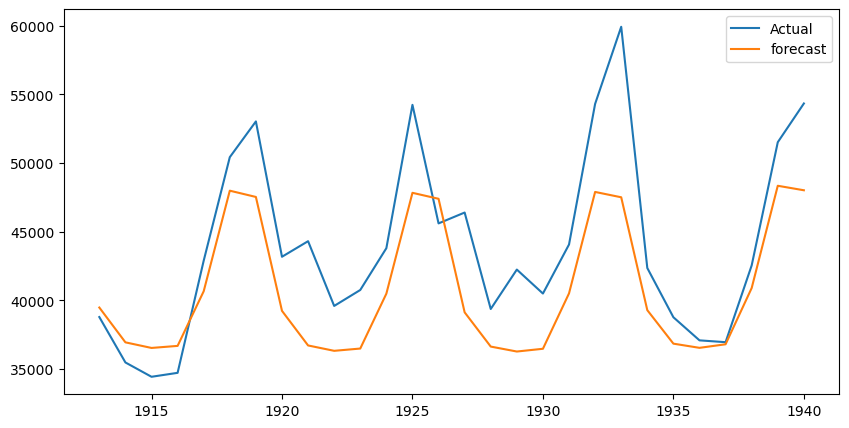

In [85]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(Compare['Actual'],label='Actual')
plt.plot(Compare['Predicted'],label='forecast')
plt.legend()
plt.show()

In [67]:
# Lets try to improve model's performance

Cross validation using Prophet

In [88]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='793 days',period='28 days',horizon='28 days')

  0%|          | 0/39 [00:00<?, ?it/s]

10:15:33 - cmdstanpy - INFO - Chain [1] start processing
10:15:33 - cmdstanpy - INFO - Chain [1] done processing
10:15:33 - cmdstanpy - INFO - Chain [1] start processing
10:15:34 - cmdstanpy - INFO - Chain [1] done processing
10:15:34 - cmdstanpy - INFO - Chain [1] start processing
10:15:35 - cmdstanpy - INFO - Chain [1] done processing
10:15:35 - cmdstanpy - INFO - Chain [1] start processing
10:15:35 - cmdstanpy - INFO - Chain [1] done processing
10:15:36 - cmdstanpy - INFO - Chain [1] start processing
10:15:36 - cmdstanpy - INFO - Chain [1] done processing
10:15:36 - cmdstanpy - INFO - Chain [1] start processing
10:15:37 - cmdstanpy - INFO - Chain [1] done processing
10:15:37 - cmdstanpy - INFO - Chain [1] start processing
10:15:37 - cmdstanpy - INFO - Chain [1] done processing
10:15:37 - cmdstanpy - INFO - Chain [1] start processing
10:15:38 - cmdstanpy - INFO - Chain [1] done processing
10:15:38 - cmdstanpy - INFO - Chain [1] start processing
10:15:38 - cmdstanpy - INFO - Chain [1]

In [89]:
df_cv.head()

ds          yhat    yhat_lower    yhat_upper      y     cutoff
0 2013-04-29  31520.183882  27602.124358  35715.512396  27445 2013-04-28
1 2013-04-30  29156.176150  25028.355641  32995.114145  28144 2013-04-28
2 2013-05-01  29013.934758  25118.315254  33026.699780  31358 2013-04-28
3 2013-05-02  29199.169550  25261.857498  33619.098751  31741 2013-04-28
4 2013-05-03  33171.953828  28942.383519  37362.677491  36950 2013-04-28

In [90]:
from prophet.plot import plot_cross_validation_metric

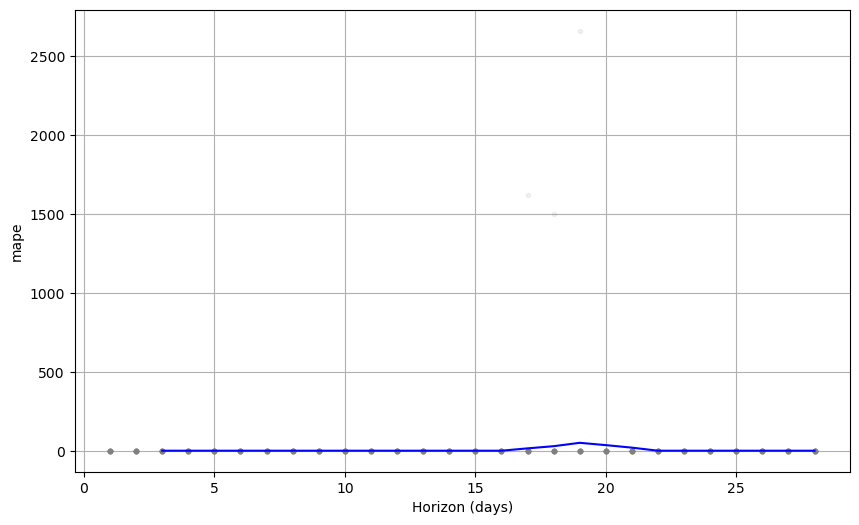

In [94]:
fig = plot_cross_validation_metric(df_cv,metric='mape')

In [93]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

horizon           mse         rmse          mae       mape     mdape  \
0   3 days  5.077239e+06  2253.272864  1860.909669   0.056908  0.053809   
1   4 days  6.117832e+06  2473.425094  2058.157681   0.064716  0.054700   
2   5 days  7.077281e+06  2660.315909  2149.363209   0.064568  0.056462   
3   6 days  9.620713e+06  3101.727372  2477.029627   0.064093  0.054751   
4   7 days  1.364325e+07  3693.677379  2874.900447   0.064285  0.053332   
5   8 days  1.363217e+07  3692.176428  3013.107984   0.070546  0.059617   
6   9 days  1.175989e+07  3429.269905  2878.914664   0.076372  0.075891   
7  10 days  1.015670e+07  3186.957691  2740.529342   0.080916  0.074013   
8  11 days  1.266046e+07  3558.153870  2920.688250   0.085655  0.075791   
9  12 days  1.457417e+07  3817.613287  2950.282731   0.082087  0.075791   
10 13 days  1.437975e+07  3792.063592  2938.561630   0.074209  0.072578   
11 14 days  1.304394e+07  3611.639568  2820.226393   0.065554  0.053077   
12 15 days  1.334708e+07  3653.365114  2927.236031   0.069951  0.062427   
13 16 days  1.252388e+07  3538.909798  2911.787488   0.077173  0.071557   
14 17 days  2.145674e+07  4632.142047  3179.605953  14.916870  0.082045   
15 18 days  3.020385e+07  5495.802938  3424.472019  28.701203  0.074807   
16 19 days  4.228913e+07  6503.009645  3750.821878  50.057243  0.071085   
17 20 days  3.503819e+07  5919.306521  3595.768256  35.437078  0.063906   
18 21 days  2.748130e+07  5242.261424  3569.260059  19.476223  0.063557   
19 22 days  1.674009e+07  4091.464992  3225.788100   0.080472  0.062729   
20 23 days  1.338417e+07  3658.438703  2844.616706   0.077277  0.064505   
21 24 days  1.010715e+07  3179.174318  2372.497547   0.073496  0.053493   
22 25 days  8.973684e+06  2995.610737  2232.824884   0.070815  0.049500   
23 26 days  8.088530e+06  2844.034172  2134.965762   0.063923  0.048071   
24 27 days  7.507331e+06  2739.950922  2121.885614   0.055078  0.044170   
25 28 days  8.768085e+06  2961.095191  2344.304313   0.054118  0.047645   

       smape  coverage  
0   0.056040  0.939544  
1   0.063370  0.900964  
2   0.063465  0.897436  
3   0.064141  0.846154  
4   0.066214  0.756057  
5   0.072291  0.743590  
6   0.077211  0.762174  
7   0.081028  0.807575  
8   0.086620  0.778405  
9   0.083477  0.785697  
10  0.075469  0.787579  
11  0.066409  0.767349  
12  0.071102  0.739826  
13  0.078345  0.745472  
14  0.102242  0.763820  
15  0.124810  0.767349  
16  0.138940  0.760056  
17  0.116820  0.761938  
18  0.095468  0.695836  
19  0.079503  0.705011  
20  0.076334  0.765937  
21  0.071278  0.859092  
22  0.068702  0.888262  
23  0.062838  0.880969  
24  0.055389  0.879087  
25  0.054954  0.835098

Hyper parameter tuning

In [97]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

In [106]:
#Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(),v)) for v in itertools.product(*param_grid.values())]
rmse = []

In [108]:
#Cross validation to evaluate all paramters
for params in all_params:
    m = Prophet(**params).fit(df_train_prophet)
    df_cv = cross_validation(m,horizon='28 days',parallel='processes')
    df_p = performance_metrics(df_cv,rolling_window=1)
    rmse.append(df_p['rmse'].values[0])

16:57:43 - cmdstanpy - INFO - Chain [1] start processing
16:57:43 - cmdstanpy - INFO - Chain [1] done processing
16:58:16 - cmdstanpy - INFO - Chain [1] start processing
16:58:16 - cmdstanpy - INFO - Chain [1] done processing
16:58:51 - cmdstanpy - INFO - Chain [1] start processing
16:58:51 - cmdstanpy - INFO - Chain [1] done processing
16:59:27 - cmdstanpy - INFO - Chain [1] start processing
16:59:27 - cmdstanpy - INFO - Chain [1] done processing
16:59:56 - cmdstanpy - INFO - Chain [1] start processing
16:59:56 - cmdstanpy - INFO - Chain [1] done processing
17:00:15 - cmdstanpy - INFO - Chain [1] start processing
17:00:15 - cmdstanpy - INFO - Chain [1] done processing
17:00:33 - cmdstanpy - INFO - Chain [1] start processing
17:00:33 - cmdstanpy - INFO - Chain [1] done processing
17:00:52 - cmdstanpy - INFO - Chain [1] start processing
17:00:52 - cmdstanpy - INFO - Chain [1] done processing
17:01:10 - cmdstanpy - INFO - Chain [1] start processing
17:01:11 - cmdstanpy - INFO - Chain [1]

In [109]:
#Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmse
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  4394.112855
1                     0.001                     0.10  4358.792621
2                     0.001                     1.00  4398.175415
3                     0.001                    10.00  4357.989951
4                     0.010                     0.01  4076.198173
5                     0.010                     0.10  4022.363868
6                     0.010                     1.00  4020.004409
7                     0.010                    10.00  4019.985591
8                     0.100                     0.01  3864.201683
9                     0.100                     0.10  3800.808896
10                    0.100                     1.00  3797.488742
11                    0.100                    10.00  3806.245268
12                    0.500                     0.01  3868.853461
13                    0.500                     0.10  3770.818170
14        

In [112]:
best_params = all_params[np.argmin(rmse)]

In [113]:
best_params

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0}

In [116]:
m = Prophet(**best_params,yearly_seasonality=True).fit(df_train_prophet)

17:11:07 - cmdstanpy - INFO - Chain [1] start processing
17:11:07 - cmdstanpy - INFO - Chain [1] done processing


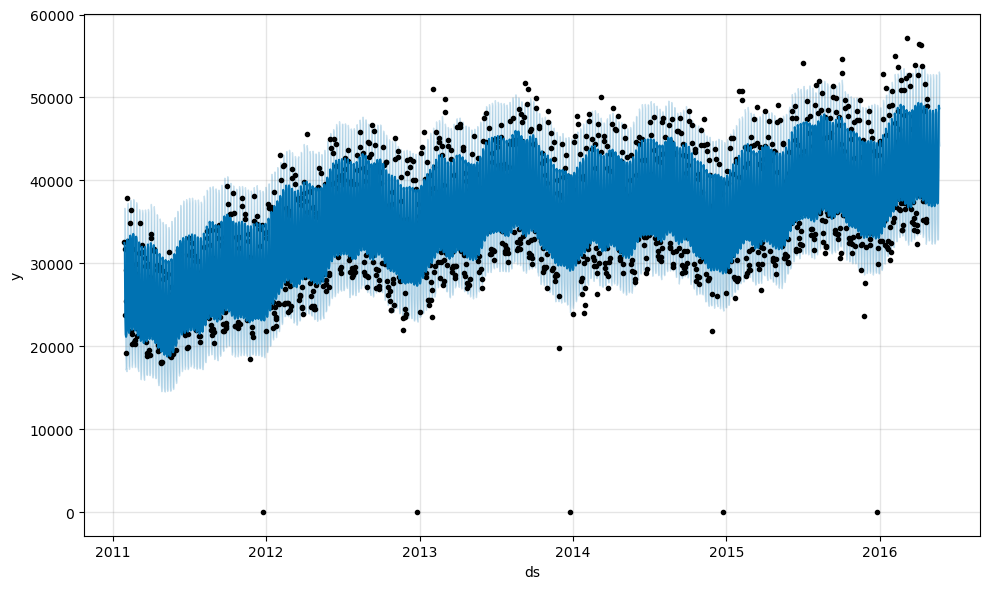

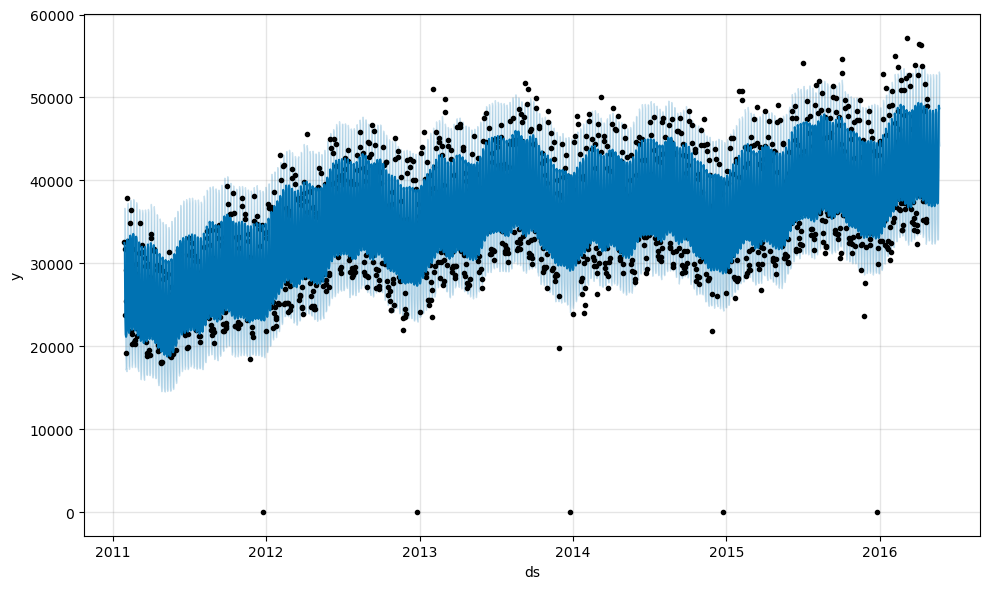

In [117]:
future = m.make_future_dataframe(periods=28)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
m.plot(forecast)

In [118]:
Compare['Predicted'] = forecast['yhat']

In [119]:
Compare

date  Actual     Predicted
1913 2016-04-25   38793  39903.243816
1914 2016-04-26   35487  37381.514727
1915 2016-04-27   34445  36987.625115
1916 2016-04-28   34732  37149.950058
1917 2016-04-29   42896  41140.731920
1918 2016-04-30   50429  48467.127687
1919 2016-05-01   53032  48024.547118
1920 2016-05-02   43181  39749.661909
1921 2016-05-03   44314  37244.095492
1922 2016-05-04   39601  36866.283040
1923 2016-05-05   40763  37044.943933
1924 2016-05-06   43805  41052.735052
1925 2016-05-07   54239  48397.277823
1926 2016-05-08   45609  47974.473933
1927 2016-05-09   46400  39721.490663
1928 2016-05-10   39379  37240.426357
1929 2016-05-11   42248  36890.146412
1930 2016-05-12   40503  37099.732910
1931 2016-05-13   44073  41142.117082
1932 2016-05-14   54308  48525.088257
1933 2016-05-15   59921  48144.594880
1934 2016-05-16   42362  39937.719115
1935 2016-05-17   38777  37506.335951
1936 2016-05-18   37096  37208.947498
1937 2016-05-19   36963  37474.135714
1938 2016-05-20   42552  41574.202733
1939 2016-05-21   51518  49016.192261
1940 2016-05-22   54338  48695.207301

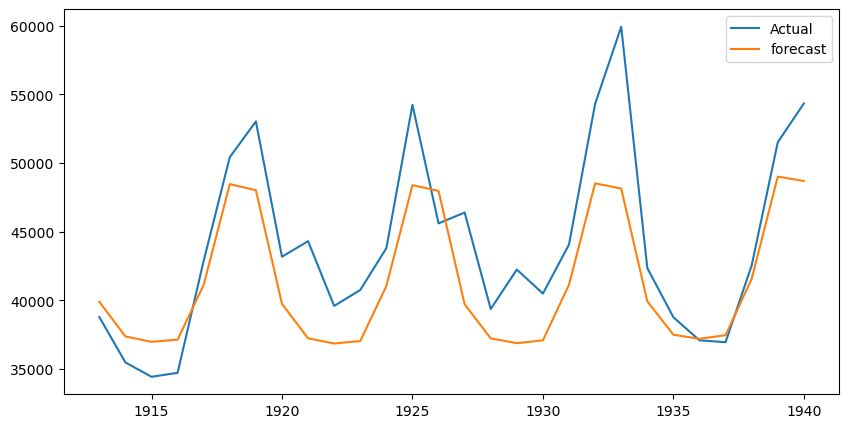

In [120]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(Compare['Actual'],label='Actual')
plt.plot(Compare['Predicted'],label='forecast')
plt.legend()
plt.show()

# Use LSTM for prediction

Label Encoding for LSTM

In [440]:
df_LSTM = X[['date','sold','weekday','event_name_1']]

In [441]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for c in df_LSTM.columns:
    if (df_LSTM[c].dtype == 'category'):
        df_LSTM[c] = Le.fit_transform(df_LSTM[c])

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_2932\1543153114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LSTM[c] = Le.fit_transform(df_LSTM[c])
C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_2932\1543153114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LSTM[c] = Le.fit_transform(df_LSTM[c])


In [442]:
len(df_LSTM['event_name_1'].value_counts())

31

Min-max scaling for features

In [443]:
df_LSTM.drop(columns='date',inplace=True)

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_2932\819209451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LSTM.drop(columns='date',inplace=True)


In [444]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_LSTM = scaler.fit_transform(df_LSTM)

In [445]:
df_LSTM_train = df_LSTM[:1913,:]
print(df_LSTM_train.shape)
df_LSTM_test = df_LSTM[1913:,:]
print(df_LSTM_test.shape)

(1913, 3)
(28, 3)


In [446]:
X_train = []
Y_train = []

for i in range (30,len(df_LSTM_train)):
    X_train.append(df_LSTM_train[i-30:i])
    Y_train.append(df_LSTM_train[i,0])
    

In [447]:
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [448]:
X_train.shape, Y_train.shape

((1883, 30, 3), (1883,))

Data reshaping

In [449]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [450]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [451]:
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120,activation='relu',return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='tanh'))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_65 (LSTM)              (None, 30, 50)            10800     
                                                                 
 dropout_61 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_66 (LSTM)              (None, 30, 60)            26640     
                                                                 
 dropout_62 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_67 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_63 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_68 (LSTM)              (None, 120)             

In [452]:
hist = model.fit(X_train,Y_train,epochs=25,batch_size=32,validation_split=0.1)

Epoch 1/25
53/53 [==============================] - 9s 67ms/step - loss: 0.0518 - val_loss: 0.0245
Epoch 2/25
53/53 [==============================] - 3s 60ms/step - loss: 0.0171 - val_loss: 0.0185
Epoch 3/25
53/53 [==============================] - 9s 179ms/step - loss: 0.0167 - val_loss: 0.0161
Epoch 4/25
53/53 [==============================] - 8s 141ms/step - loss: 0.0135 - val_loss: 0.0119
Epoch 5/25
53/53 [==============================] - 4s 74ms/step - loss: 0.0103 - val_loss: 0.0077
Epoch 6/25
53/53 [==============================] - 5s 99ms/step - loss: 0.0091 - val_loss: 0.0076
Epoch 7/25
53/53 [==============================] - 6s 107ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 8/25
53/53 [==============================] - 6s 104ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 9/25
53/53 [==============================] - 5s 93ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 10/25
53/53 [==============================] - 4s 79ms/step - loss: 0.0069 - val_loss: 0.0101
Epoch

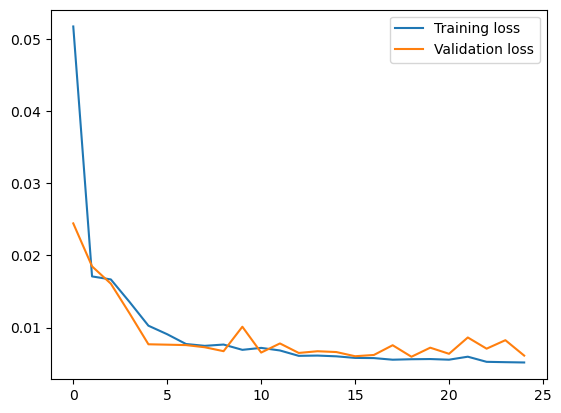

In [453]:
plt.plot(hist.history['loss'],label='Training loss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

In [454]:
df_LSTM_test = np.vstack((df_LSTM_train[-30:],df_LSTM_test))

In [455]:
X_test = []
Y_test = []

for i in range (30,len(df_LSTM_test)):
    X_test.append(df_LSTM_test[i-30:i])
    Y_test.append(df_LSTM_test[i,0])

In [456]:
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [457]:
X_test.shape

(28, 30, 3)

In [458]:
Y_test.shape

(28,)

In [459]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 471ms/step


In [460]:
X

date   sold  wm_yr_wk    weekday  wday  month  year       d  \
0    2011-01-29  32631     11101   Saturday     1      1  2011     d_1   
1    2011-01-30  31749     11101     Sunday     2      1  2011     d_2   
2    2011-01-31  23783     11101     Monday     3      1  2011     d_3   
3    2011-02-01  25412     11101    Tuesday     4      2  2011     d_4   
4    2011-02-02  19146     11101  Wednesday     5      2  2011     d_5   
...         ...    ...       ...        ...   ...    ...   ...     ...   
1936 2016-05-18  37096     11616  Wednesday     5      5  2016  d_1937   
1937 2016-05-19  36963     11616   Thursday     6      5  2016  d_1938   
1938 2016-05-20  42552     11616     Friday     7      5  2016  d_1939   
1939 2016-05-21  51518     11617   Saturday     1      5  2016  d_1940   
1940 2016-05-22  54338     11617     Sunday     2      5  2016  d_1941   

     event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
0             NaN          NaN          NaN          NaN        0        0   
1             NaN          NaN          NaN          NaN        0        0   
2             NaN          NaN          NaN          NaN        0        0   
3             NaN          NaN          NaN          NaN        1        1   
4             NaN          NaN          NaN          NaN        1        0   
...           ...          ...          ...          ...      ...      ...   
1936          NaN          NaN          NaN          NaN        0        0   
1937          NaN          NaN          NaN          NaN        0        0   
1938          NaN          NaN          NaN          NaN        0        0   
1939          NaN          NaN          NaN          NaN        0        0   
1940          NaN          NaN          NaN          NaN        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1936        0  
1937        0  
1938        0  
1939        0  
1940        0  

[1941 rows x 15 columns]

In [461]:
scaler.scale_

array([1.66917042e-05, 1.66666667e-01, 3.33333333e-02])

In [462]:
predicted_sales = Y_pred*(1/scaler.scale_[0])

In [463]:
Compare['LSTM_predicted_prices'] = predicted_sales

In [464]:
Compare

date  Actual     Predicted  LSTM_predicted_prices
1913 2016-04-25   38793  39903.243816           41586.347656
1914 2016-04-26   35487  37381.514727           36854.433594
1915 2016-04-27   34445  36987.625115           35881.988281
1916 2016-04-28   34732  37149.950058           36627.578125
1917 2016-04-29   42896  41140.731920           44788.390625
1918 2016-04-30   50429  48467.127687           50807.402344
1919 2016-05-01   53032  48024.547118           51917.648438
1920 2016-05-02   43181  39749.661909           44067.406250
1921 2016-05-03   44314  37244.095492           41102.472656
1922 2016-05-04   39601  36866.283040           39210.839844
1923 2016-05-05   40763  37044.943933           38516.425781
1924 2016-05-06   43805  41052.735052           45289.679688
1925 2016-05-07   54239  48397.277823           50654.644531
1926 2016-05-08   45609  47974.473933           50934.406250
1927 2016-05-09   46400  39721.490663           43921.558594
1928 2016-05-10   39379  37240.426357           39656.660156
1929 2016-05-11   42248  36890.146412           37950.992188
1930 2016-05-12   40503  37099.732910           36525.335938
1931 2016-05-13   44073  41142.117082           44058.648438
1932 2016-05-14   54308  48525.088257           49551.835938
1933 2016-05-15   59921  48144.594880           50067.765625
1934 2016-05-16   42362  39937.719115           41580.355469
1935 2016-05-17   38777  37506.335951           37329.582031
1936 2016-05-18   37096  37208.947498           36311.789062
1937 2016-05-19   36963  37474.135714           36513.140625
1938 2016-05-20   42552  41574.202733           44093.210938
1939 2016-05-21   51518  49016.192261           49681.593750
1940 2016-05-22   54338  48695.207301           50146.632812

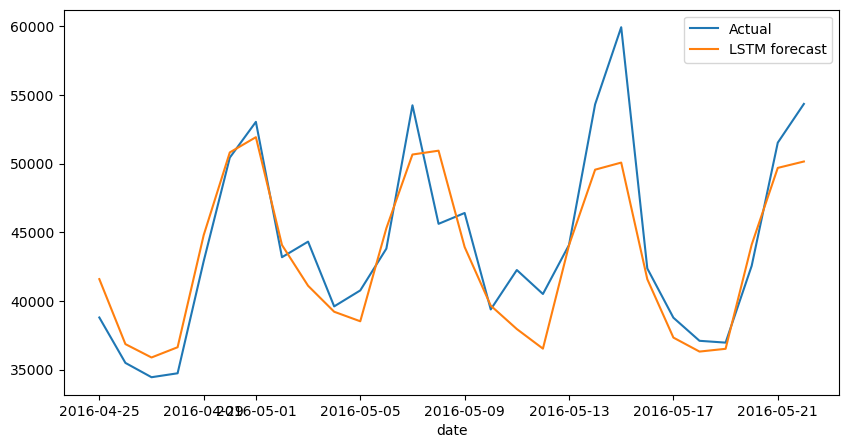

In [469]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(Compare['date'],Compare['Actual'],label='Actual')
plt.plot(Compare['date'],Compare['LSTM_predicted_prices'],label='LSTM forecast')
plt.xlabel('date')
plt.legend()
plt.show()

In [466]:
#We can further tune the model to improve results